# ML Base introduce
- Perceptron
- linear regression & logistic regression
- CNN
- RNN
- DNN

## by Cloud.yu 2018-2-9

# Perceptron  (感知机)

>感知机模型: $f(x)=sign(wx+b)$, 其中$w$叫做权重(weight)， $b$叫做偏置(bias)

>线性几何平面: $wx+b=0$

- PLA
- Pocket


# PLA  (Percetron Learning Algorithm)
----
## PLA算法步骤
----
- **Input**: traing data ($T = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{i}, y_{i})\}$) 
- **Output**: $(w, b)$
    - Step1. init $(w, b)\rightarrow(0,0)$
    - Step2. init $i\rightarrow 0$
    - Step3. while $i != len(T)$ do
        - Step4.get data $(x_{i}, y_{i})$ from $T$
        - Step5. if $y_{i}(wx_{i}+b) <= 0$ then
            - $(w, b) \rightarrow (w, b) + y_{i}x_{i}$
            - return to Step2.
        - end if
        - Step6. $i=i+1$
    - end while
----



![](pla.png)

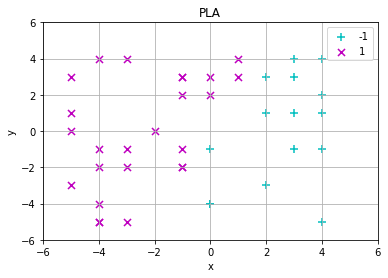

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

x = np.random.randint(-5,5, (40,2))

#  2y - 3x
label = np.sign(np.dot(x,np.transpose([2, -4.3])))

fig = plt.figure(1)
idx_0 = np.where(label == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('PLA')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)
plt.show()

$$ \begin 
$$ x = y+2 $$


In [3]:
cnt = 0
pla = np.zeros((2,1))
_update = 0

while cnt<40:
    _update = np.sign(np.dot(x[cnt,:], pla)) * label[cnt]
    if _update <= 0:
        _x = x[cnt, :]
        _x.shape = (1,2)
        _x = np.transpose(_x)
        pla = pla + _x*label[cnt]
        cnt = 0
    else:
        cnt = cnt+1
        continue
print(pla)



    

[[ 4.]
 [-9.]]


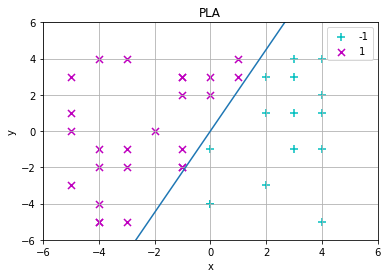

In [5]:
fig = plt.figure(1)
idx_0 = np.where(label == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('PLA')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)

k = -pla[1,:] / pla[0,:]
line_x = np.linspace(-5,5,50) 
line_y = k*line_x
plt.plot(line_x,line_y)
plt.show()

# Tanks all, for end!!

In [18]:
pocket = np.random.randint(-4,4, (2,1))
print(pocket)
print(x)
def cal_loss(_pocket, _x, _label):
    _ = np.sign(np.dot(_x, _pocket))
    _.shape = (40,1)
    _ = np.transpose(_)
    idx = np.where(_!=_label)
    loss = np.sum(_!=_label)
    return idx, loss

for i in range(100):
    cnt = 0
    idx, pre_loss = cal_loss(pocket, x, label)
    cur_loss = pre_loss
    while pre_loss <= cur_loss and cnt < len(idx):
        pocket = pocket + _x *label[idx[cnt]]
        _idx, cur_loss = cal_loss(pocket, x, label)
        cnt = cnt + 1
    
print(cal_loss(pocket, x, label))

[[-3]
 [-4]]
[[ 4 -4]
 [-2 -3]
 [ 1  2]
 [-1 -1]
 [-5 -4]
 [ 3  3]
 [ 4  1]
 [ 2  4]
 [-3  2]
 [-4  0]
 [ 0 -2]
 [ 3 -1]
 [ 0 -5]
 [ 4  3]
 [ 1  4]
 [-5 -4]
 [ 4 -3]
 [-1  3]
 [ 2 -1]
 [ 3 -1]
 [-1  0]
 [-5  4]
 [-2 -1]
 [-1 -4]
 [ 2  0]
 [-1  4]
 [ 3  2]
 [-4 -4]
 [-4  0]
 [ 1 -5]
 [ 3 -5]
 [-5 -3]
 [ 1  3]
 [ 3  1]
 [ 4  4]
 [-3 -5]
 [-2 -1]
 [-2 -4]
 [-1 -3]
 [ 3  0]]


ValueError: cannot reshape array of size 480 into shape (40,1)